In [1]:
import torch
from torch.autograd import Variable
X_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
W = Variable(torch.Tensor([1.0]), requires_grad=True)

def forward(x):
    return x*W
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y) * (y_pred -y)
# before training
print("predict before training", 4, forward(4).data[0])

predict before training 4 tensor(4.)


In [2]:
# Training loop
for epoch in range(100):
   for x_val, y_val in zip(X_data, y_data):
       l = loss(x_val, y_val)
       l.backward()
       print("\tgrad: ", x_val, y_val, W.grad.data[0])
       W.data = W.data - 0.01 * W.grad.data
      # Manually zero the gradients after updating weights
       W.grad.data.zero_()
   print("progress:", epoch, l.data[0])
# After training
print("predict (after training)",  4, forward(4).data[0])

	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad:  1.0 2.0 te

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
inp = Variable(torch.randn(1,10)) 
model  = nn.Linear(in_features=10,
                   out_features=5, bias=True)
model(inp)

tensor([[ 0.2031,  0.9266, -0.8565,  0.8443, -0.4244]],
       grad_fn=<AddmmBackward0>)

In [4]:
model.weight

Parameter containing:
tensor([[-0.0969,  0.2549,  0.0171, -0.1118,  0.1135,  0.2219, -0.0544,  0.2818,
          0.0222, -0.1756],
        [ 0.2987,  0.2512, -0.0968,  0.2125, -0.1976,  0.2127, -0.1003, -0.2232,
         -0.2614,  0.0773],
        [ 0.0295,  0.0554,  0.2378, -0.2032, -0.2390, -0.1072,  0.1914, -0.0605,
         -0.2732,  0.2981],
        [-0.1083,  0.2824, -0.1410, -0.0452, -0.2810,  0.0954, -0.2249, -0.2207,
         -0.2733,  0.0656],
        [ 0.0493, -0.1977,  0.0037,  0.1182,  0.1642,  0.1015,  0.1639,  0.2689,
         -0.0875,  0.0196]], requires_grad=True)

In [5]:
model.bias

Parameter containing:
tensor([-0.0137,  0.2806, -0.1411,  0.2727, -0.1456], requires_grad=True)

## Activation function 

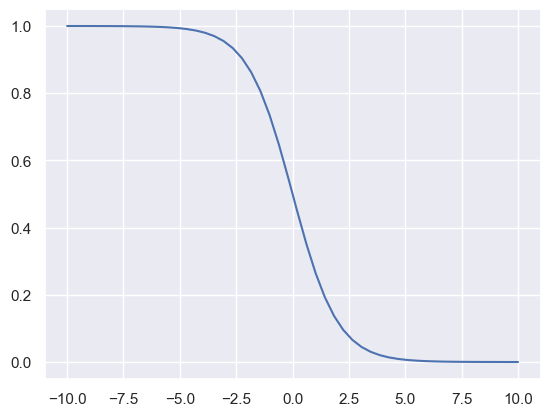

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
X = np.linspace(-10,10)
y = 1/(1+np.exp(X))
plt.plot(X,y)
plt.show()

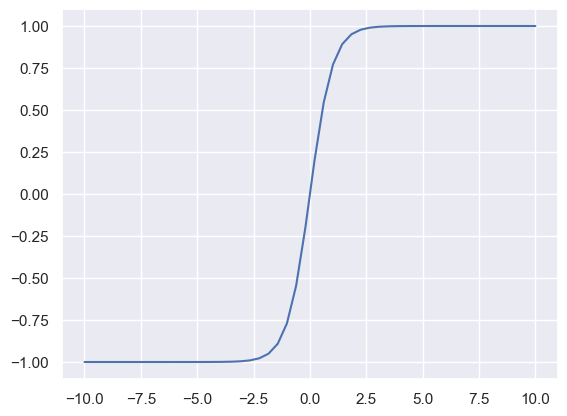

In [7]:
y2 = np.tanh(X)
plt.plot(X,y2)
plt.show()

In [8]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# Initialize a tensor of size 5x3 filled with zeros
x = torch.Tensor(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [9]:
device = 'cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else 'cpu')

In [10]:
x = torch.Tensor([1,2,3,4]).to(device)
y = torch.Tensor([5,6,7,8]).to(device)


In [11]:
x

tensor([1., 2., 3., 4.], device='mps:0')

In [12]:
result = x+y
print(result)

tensor([ 6.,  8., 10., 12.], device='mps:0')


In [13]:
import torch
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.hidden_layer = nn.Linear(1,3)
        self.hidden_layer2 = nn.Linear(3,5)
        self.output_layer = nn.Linear(5,1)
    def forward(self, x):
        x = torch.relu(self.hidden_layer(x))
        x = torch.relu(self.hidden_layer2(x))
        x =self.output_layer(x)
        return x
model = ANN()
print(model.to(device))

ANN(
  (hidden_layer): Linear(in_features=1, out_features=3, bias=True)
  (hidden_layer2): Linear(in_features=3, out_features=5, bias=True)
  (output_layer): Linear(in_features=5, out_features=1, bias=True)
)


In [14]:
seq_ANN = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,5),
    nn.ReLU(),
    nn.Linear(5,1))
print(seq_ANN.to(device))

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


In [15]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_california_housing 
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset 
#from tqdm.notebook import tqdm
import warnings
#import seaborn as sns
#sns.set()
warnings.filterwarnings("ignore")
# Set fixed random number seed
torch.manual_seed(42);

dataset = fetch_california_housing()
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [16]:
class MLP(nn.Module): 
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(8, 24)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(24, 12)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(12, 6)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(6, 1)
    def forward(self, x): 
        x = self.layer1(x) 
        x = self.relu1(x) 
        x = self.layer2(x) 
        x = self.relu2(x) 
        x = self.layer3(x) 
        x = self.relu3(x) 
        x = self.layer4(x) 
        return x

model = MLP()
device = 'cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else 'cpu')
# Check the selected device
print("Selected device:", device)
model.to(device)

Selected device: mps


MLP(
  (layer1): Linear(in_features=8, out_features=24, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=24, out_features=12, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=12, out_features=6, bias=True)
  (relu3): ReLU()
  (layer4): Linear(in_features=6, out_features=1, bias=True)
)

In [17]:
dataset.data.shape

(20640, 8)

In [18]:
dataset.target.shape

(20640,)

In [19]:
X = dataset.data
y = dataset.target
y = y.reshape(-1,1)
print(y.shape)

(20640, 1)


In [20]:
# Normalization
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_new,y,
                                                test_size=0.2,
                                                random_state=42)



In [21]:
X_train = torch.Tensor(X_train).to(device)
X_test = torch.Tensor(X_test).to(device)
y_train = torch.Tensor(y_train).to(device)
y_test = torch.Tensor(y_test).to(device)
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

In [22]:
!pip install tqdm

MSE: 0.31
RMSE: 0.56


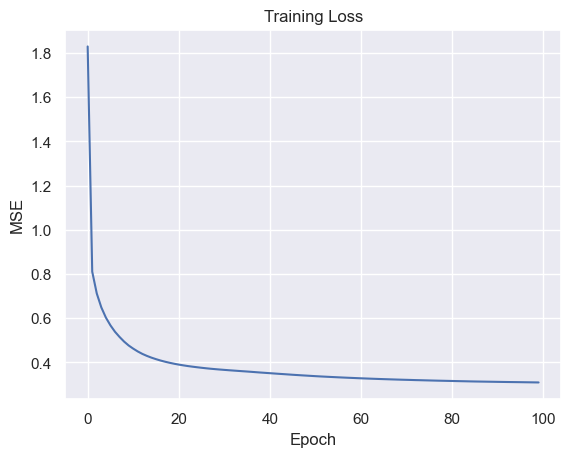

In [23]:
from tqdm.notebook import tqdm
# Loss function and optimizer
loss_fn = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100  # Number of epochs to run
batch_size = 10  # Size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
# Hold the best model
best_mse = np.inf  # Initialize to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # Take a batch
            X_batch = X_train[start:start+batch_size].to(device)
            y_batch = y_train[start:start+batch_size].to(device)
            # Forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            # Update weights
            optimizer.step()
            # Print progress
            bar.set_postfix(mse=float(loss.item()))
    # Evaluate accuracy at end of each epoch
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test.to(device))
        mse = loss_fn(y_pred, y_test.to(device))
        mse = float(mse)
        history.append(mse)
        if mse < best_mse:
            best_mse = mse
            best_weights = copy.deepcopy(model.state_dict())

# Restore model to best weights and print final accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))

# Plot training history
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training Loss')
plt.savefig("house_train_loss.png")
plt.show()

In [24]:
df = pd.read_csv("data/wine-quality-white-and-red.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.3,0.4,20.7,0.0,45.0,170.0,1.0,3.0,0.5,8.8,6
1,white,6.3,0.3,0.3,1.6,0.0,14.0,132.0,1.0,3.3,0.5,9.5,6
2,white,8.1,0.3,0.4,6.9,0.1,30.0,97.0,1.0,3.3,0.4,10.1,6
3,white,7.2,0.2,0.3,8.5,0.1,47.0,186.0,1.0,3.2,0.4,9.9,6
4,white,7.2,0.2,0.3,8.5,0.1,47.0,186.0,1.0,3.2,0.4,9.9,6


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = df.drop('type', axis=1)
y = df['type']

# Convert categorical values to numerical values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

sc = StandardScaler()
X = sc.fit_transform(X)


trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)


# Convert target variables to NumPy arrays and reshape
trainY = np.array(trainY).reshape(-1, 1)
testY = np.array(testY).reshape(-1, 1)

# Convert data to PyTorch tensors with the correct data type
X_train = torch.Tensor(trainX).to(device)
y_train = torch.Tensor(trainY).to(device) 
X_test = torch.Tensor(testX).to(device)
y_test = torch.Tensor(testY).to(device)

In [26]:
# Define the ANN model
class classification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(classification, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = classification(input_size, hidden_size, output_size)
print(model.to(device))


classification(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [27]:
model.to(device)

classification(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [28]:
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = np.round(predictions.cpu().numpy()).astype(int).reshape(-1)
    accuracy = np.mean(predictions == y_test.cpu().numpy().reshape(-1))
    print(f'Accuracy: {accuracy:.4f}')

Epoch [10/100], Loss: 0.0468
Epoch [20/100], Loss: 0.0063
Epoch [30/100], Loss: 0.0034
Epoch [40/100], Loss: 0.0028
Epoch [50/100], Loss: 0.0009
Epoch [60/100], Loss: 0.0036
Epoch [70/100], Loss: 0.0005
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0154
Epoch [100/100], Loss: 0.0022
Accuracy: 0.9946


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predY = model(X_test)
    predY = np.round(predY.cpu().numpy()).astype(int).reshape(-1)  # Ensure predictions are integers
# Calculate classification metrics
accuracy = np.mean(predY == testY.reshape(-1))
conf_matrix = confusion_matrix(testY, predY)
class_report = classification_report(testY, predY, target_names=le.classes_)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
plt.show()

Accuracy: 0.9946
Confusion Matrix:
[[316   6]
 [  1 977]]

Classification Report:
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       322
       white       0.99      1.00      1.00       978

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



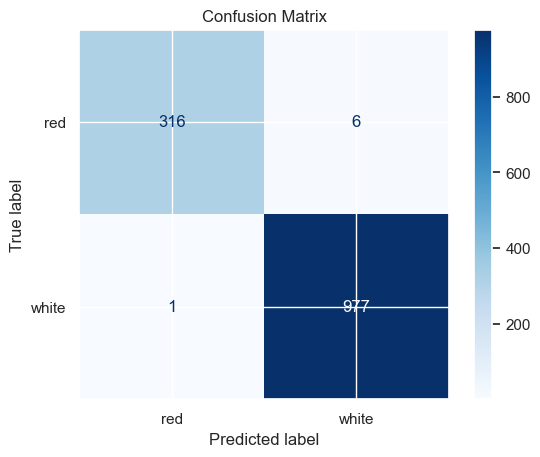

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig("fig/wine_quality_confusion_matrix.png")
plt.show()

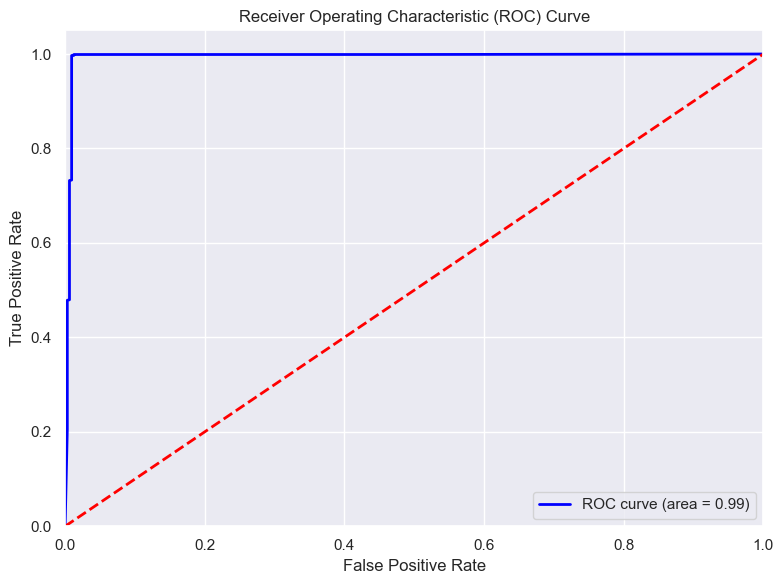

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch
# Calculate predicted probabilities using sigmoid activation

# Calculate predicted probabilities using sigmoid activation
with torch.no_grad():
    ypred_proba = torch.sigmoid(model(X_test)).cpu().numpy()

# Calculate ROC AUC score
roc_auc = roc_auc_score(testY, ypred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(testY, ypred_proba)

# Plot ROC curve in a single figure
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()  # Tighten layout to prevent overlap
plt.savefig("fig/wine_quality_roc_auc.png")
plt.show()

In [32]:
# save the trained model
model_path = 'model.pth'
torch.save(model, model_path)
# Restoring your model is easy too
mpl_model = torch.load(model_path)

## CNN

In [33]:
#!pip install torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
image_size = (32, 32, 3)

train_set = torchvision.datasets.CIFAR10(root='.', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='.', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
criterion = nn.CrossEntropyLoss()

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(128 * 9 * 9, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 128 * 9 * 9)
        x = self.classifier(x)
        return x

In [35]:
net = ConvNet()
net.to(device)

# also the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [ ]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(1, 33):  # loop over the dataset multiple times
    
    running_loss = .0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        if device == 'mps':
            inputs, labels = inputs.to(device), labels.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    running_loss /= len(train_loader)
    train_loss.append(running_loss)
    running_acc = correct / total
    train_acc.append(running_acc)
    
    if epoch % 4 == 0:
        print('\nEpoch: {}'.format(epoch))
        print('Train Acc. => {:.3f}%'.format(100 * running_acc), end=' | ')
        print('Train Loss => {:.5f}'.format(running_loss))
    
    # evaluate on the test set
    # note this is usually performed on the validation set
    # for simplicity we just evaluate it on the test set
    with torch.no_grad():
        correct = 0
        total = 0
        test_running_loss = .0
        for data in test_loader:
            inputs, labels = data
            if device == 'mps':
                inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_running_loss /= len(test_loader)
        test_loss.append(test_running_loss)
        test_running_acc = correct / total
        test_acc.append(test_running_acc)
        
        if epoch % 4 == 0:
            print('Test Acc.  => {:.3f}%'.format(100 * test_running_acc), end=' | ')
            print('Test Loss  => {:.5f}'.format(test_running_loss))

print('Finished Training')

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.legend()
plt.show()

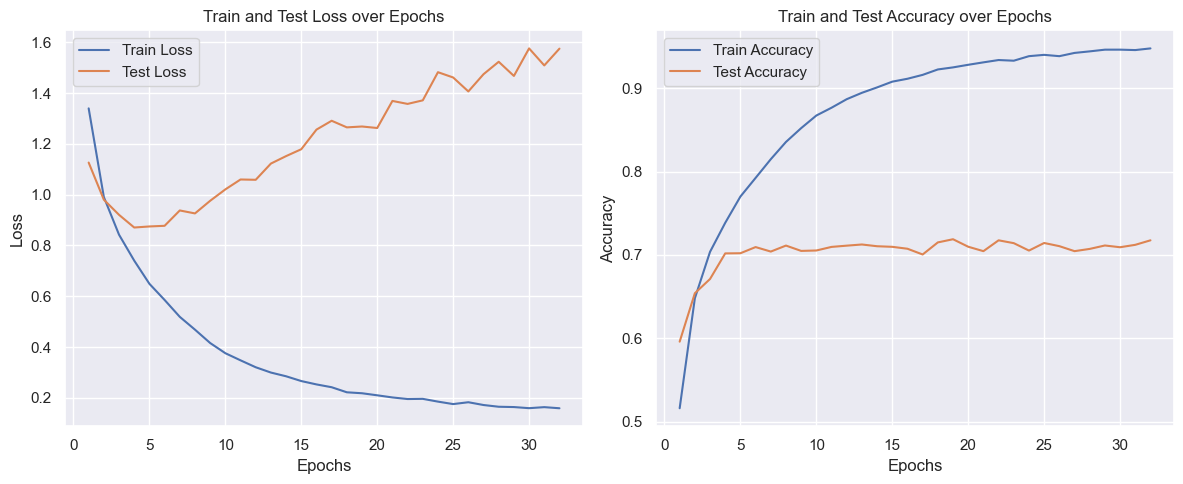

In [47]:
# Plotting train and test loss
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 33), train_loss, label='Train Loss')
plt.plot(range(1, 33), test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.grid(True)

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 33), train_acc, label='Train Accuracy')
plt.plot(range(1, 33), test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()
plt.grid(True)
# Display the plots
plt.tight_layout()
plt.savefig("fig/loss_accuracy_CIFAR10.png")
plt.show()

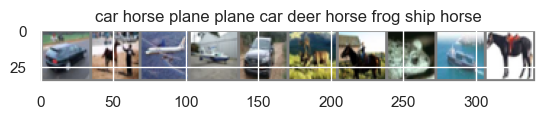

<Figure size 640x480 with 0 Axes>

In [48]:
# Define a function to show images
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Define the class names for CIFAR-10
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Select only the first 10 images and labels
inputs = inputs[:10]
classes = classes[:10]

# Make a grid from the selected batch
out = torchvision.utils.make_grid(inputs, nrow=10)

# Display the images with correct titles
imshow(out, title=' '.join([class_names[x] for x in classes]))
plt.savefig("fig/class_labels_CIFAR10.png")
plt.show()

In [ ]:
import torch as T
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset
train_set = datasets.CIFAR10(root='./data', train=True,
                             download=True, transform=transform_train)
train_loader = DataLoader(train_set, batch_size=batch_size,
                          shuffle=True, num_workers=2)

test_set = datasets.CIFAR10(root='./data', train=False,
                            download=True, transform=transform_test)
test_loader = DataLoader(test_set, batch_size=batch_size,
                         shuffle=False, num_workers=2)

# Define your network (with dropout layers added)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 9 * 9, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 128 * 9 * 9)
        x = self.classifier(x)
        return x

# Initialize the network
net = ConvNet(num_classes=10)
device = 'cuda' if T.cuda.is_available() else 'cpu'
net.to(device)

# Define the criterion and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

train_loss = []
test_loss = []
train_acc = []
test_acc = []

early_stopping_threshold = 5
no_improvement_count = 0
best_test_loss = float('inf')

for epoch in range(1, 33):  # loop over the dataset multiple times
    
    running_loss = .0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        if device == 'cuda':
            inputs, labels = inputs.to(device), labels.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = T.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    running_loss /= len(train_loader)
    train_loss.append(running_loss)
    running_acc = correct / total
    train_acc.append(running_acc)
    
    if epoch % 4 == 0:
        print('\nEpoch: {}'.format(epoch))
        print('Train Acc. => {:.3f}%'.format(100 * running_acc), end=' | ')
        print('Train Loss => {:.5f}'.format(running_loss))
    
    # evaluate on the test set
    net.eval()
    with T.no_grad():
        correct = 0
        total = 0
        test_running_loss = .0
        for data in test_loader:
            inputs, labels = data
            if device == 'cuda':
                inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = T.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_running_loss /= len(test_loader)
        test_loss.append(test_running_loss)
        test_running_acc = correct / total
        test_acc.append(test_running_acc)
        
        if epoch % 4 == 0:
            print('Test Acc.  => {:.3f}%'.format(100 * test_running_acc), end=' | ')
            print('Test Loss  => {:.5f}'.format(test_running_loss))

    scheduler.step()

    # Early stopping
    if test_running_loss < best_test_loss:
        best_test_loss = test_running_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= early_stopping_threshold:
            print('Early stopping at epoch {}'.format(epoch))
            break

print('Finished Training')

100%|█████████████████████████████| 170498071/170498071 [06:48<00:00, 416929.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Epoch: 4
Train Acc. => 55.956% | Train Loss => 1.23322
Test Acc.  => 65.750% | Test Loss  => 0.96544

Epoch: 8
Train Acc. => 60.874% | Train Loss => 1.10386
Test Acc.  => 68.840% | Test Loss  => 0.88814

Epoch: 12
Train Acc. => 65.946% | Train Loss => 0.96298
Test Acc.  => 72.970% | Test Loss  => 0.76046

Epoch: 16
Train Acc. => 67.754% | Train Loss => 0.92021
Test Acc.  => 73.860% | Test Loss  => 0.72984

Epoch: 20
Train Acc. => 68.716% | Train Loss => 0.89714
Test Acc.  => 74.560% | Test Loss  => 0.71997
